PHYS 381: Computational Physics I

Jared Crebo 30085839

Final Take-Home Exam

Kernel: Python 3.10.11 | IDE: Visual Studio Code

3 Fourier transform analysis

Text(0.5, 1.0, 'Unprocessed Signal Data')

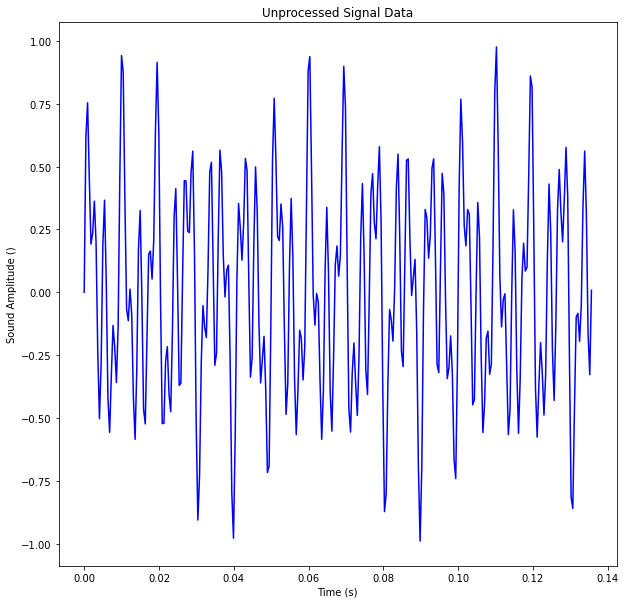

In [262]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("superposition_signal.txt")
x = data[:300,0]
y = data[:300,1]

fig, ax = plt.subplots(figsize=[10,10])
ax.plot(x, y, color = 'blue')
ax.set_xlabel("Time (s)")
ax.set_ylabel("Sound Amplitude ()")
ax.set_title("Unprocessed Signal Data")

This figure shows the raw, unprocessed signal data provided. It is a function of time and is a superposition of three sine waves with frequencies $\nu_{1}$, $\nu_{2}$, and $\nu_{3}$. 
The first 300 datapoints are taken since they are representative of the repeated sine waves and allow for a faster analysis and closer zoom on the data when plotting. 

In [263]:
N = int(len(x)) # Number of sampling points
h = (x[-1] - x[0]) / N # Step size
n = np.linspace(0,N-1,N) # Step array

def re_data(fm, m, n, N):
    '''
    Returns real component of function Fn from fm
    fm - dataset
    m - iterative index
    n - iterative index
    N - total sampling points
    h - step size
    '''
    return fm[m] * np.cos(2*np.pi*m*n/N)

def im_data(fm, m, n, N):
    '''
    Returns imaginary component of function Fn from fm
    fm - dataset
    m - iterative index
    n - iterative index
    N - total sampling points
    h - step size
    '''
    return fm[m] * np.sin(2*np.pi*m*n/N)


def real_imag(func, N):
    '''
    Returns the real, imaginary, and power spectrum of Discrete Fourier Transform (DFT)
    func - original function
    N - total sampling points
    h - step size
    Function includes filtration threshold e to filter noise in data
    '''
    real = np.zeros(N)
    imag = np.zeros(N)
    f = np.zeros(N)
    for n in range(N):
        for m in range(N):
            # Calculate real component of DFT
            real[n] += re_data(func, m, n, N)
            # Calculate imaginary component of DFT
            imag[n] += im_data(func, m, n, N)
    # Calculate power spectrum of DFT
    power_spec = np.sqrt(real**2 + imag**2)
    return real, imag, power_spec

def reconstruct(real, imag, N):
    '''
    Reconstruct original function using DFT
    real - array of real components of f(t)
    imag - array of imaginary components of f(t)
    N - total sampling points
    '''
    f = np.zeros(N)
    for m in range(N):
        for n in range(N):
            # Calculate fourier transform at each step m
            f[m] += real[n] * np.cos(2*np.pi*m*n/N) + imag[n] * np.sin(2*np.pi*m*n/N)
    f /= N
    # Return the discrete fourier transform
    return f

The code above defines the functions to sample any dataset at N points with a step size h. It will use the sampled dataset to derive the real and imaginary Fourier coefficients, as well as the power spectrum. The final function is used to reconstruct the original signal based on the Fourier coefficients calculated and the number of datapoint sampled. This is the Discrete Fourier Transform (DFT) that is being used to reconstruct a discrete, nonlinear dataset into a continuous function. 

These functions will be implemented below to sample the dataset and plot the results. 

The three dominant frequencies are: 10.00, 5.26, 1.23 Hz


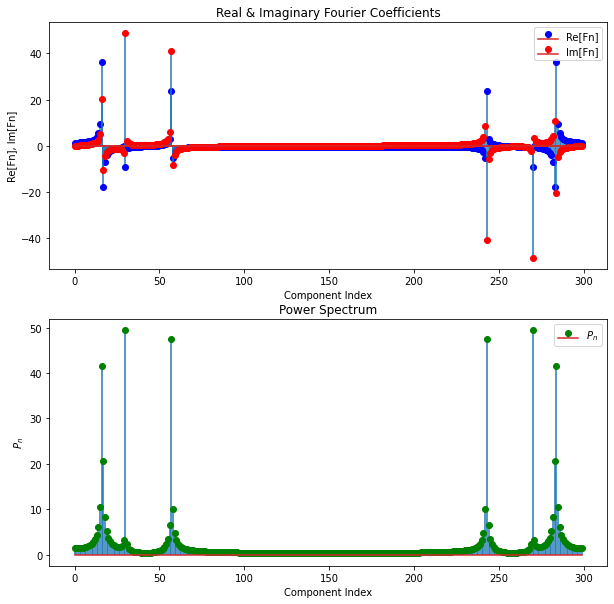

In [264]:
real, imag, power = real_imag(y, N)
func = reconstruct(real, imag, N)

fig, ax = plt.subplots(2,1,figsize=[10,10])
# Plot real and imaginary components of DFT
ax[0].stem(n, real, markerfmt = 'bo', label = 'Re[Fn]')
ax[0].stem(n, imag, markerfmt = 'ro', label = 'Im[Fn]')
ax[0].set_xlabel("Component Index")
ax[0].set_ylabel("Re[Fn], Im[Fn]")
ax[0].set_title("Real & Imaginary Fourier Coefficients")
ax[0].legend()
# Plot power spectrum of DFT
ax[1].stem(n, power, markerfmt = 'go', label = '$P_n$')
ax[1].set_xlabel("Component Index")
ax[1].set_ylabel("$P_n$")
ax[1].set_title('Power Spectrum')
ax[1].legend()

dom_freqs = 1 / (n[np.where(power > 47)] / N)

print(f'The three dominant frequencies are: {dom_freqs[0]:.2f}, {dom_freqs[1]:.2f}, {dom_freqs[2]:.2f} Hz')

These figures show the real and imaginary Fourier coefficients as well as the power spectrum plotted against the frequencies. The imaginary contribution seems to dominate more than the real component, which is evident in having the imaginary component of 2 of 3 dominant frequencies being more prevalent than the real component. On the left side of the first plot, two red imaginary components peak at higher values than the blue, real component. 

The dominant frequencies are shown to be 10Hz, 5.26Hz, and 1.23Hz based on the top three magnitudes in the power spectrum. 

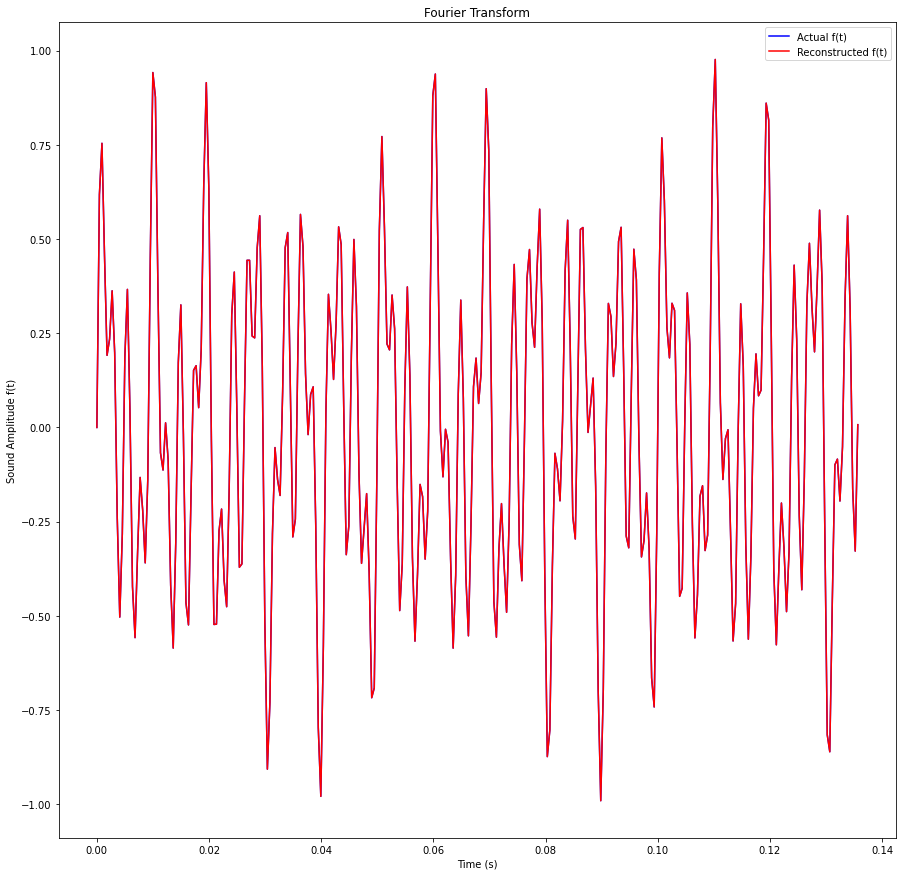

In [265]:
fig, ax = plt.subplots(figsize=[15,15])
# Plot actual and reconstructed functions
ax.plot(x, y, color = 'blue', label = 'Actual f(t)')
ax.plot(x, func, color = 'red', label = 'Reconstructed f(t)')
ax.set_xlabel("Time (s)")
ax.set_ylabel("Sound Amplitude f(t)")
ax.set_title("Fourier Transform")
ax.legend()

The figure above shows a perfect reconstruction of the initial discrete dataset with a continuous function that perfectly overlays the data. This allows for analysis into the instantaneous rates of change of the data and noise filtration, among other applications. 